# 项目11 模型评估与优化

## 项目实训

### 任务一 使用交叉验证评估模型

#### 1. 导入数据集

In [16]:
from sklearn.datasets import load_iris
import numpy as np
iris = load_iris()

#### 2. 构建分类模型

In [17]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
svc = SVC(kernel='linear')
seed=7
np.random.seed(seed)

#### 3. 8折交叉验证

In [18]:
kfold=StratifiedKFold(n_splits=8,shuffle=True,random_state=seed)
score = cross_val_score(svc,iris.data,iris.target,cv=kfold)
print('交叉验证得分：{}'.format(score))

交叉验证得分：[1.         1.         0.94736842 1.         0.84210526 1.
 0.94444444 1.        ]


#### 4. 8折交叉验证评价得分

In [19]:
print('交叉验证平均分：{:.3f}'.format(score.mean()))

交叉验证平均分：0.967


#### 5. 10折交叉验证

In [20]:
#设置n_splits参数为10
kfold=StratifiedKFold(n_splits=10,shuffle=True,random_state=seed)
score = cross_val_score(svc,iris.data,iris.target,cv=kfold)
print('交叉验证得分：{}'.format(score))

交叉验证得分：[0.93333333 1.         1.         0.93333333 1.         0.93333333
 1.         1.         0.93333333 1.        ]


#### 6. 10折交叉验证平均得分

In [21]:
print('交叉验证平均得分：{:.3f}'.format(score.mean()))

交叉验证平均得分：0.973


### 任务二 使用网络搜索算法进行模型调参

#### 1. 网络搜索算法

In [22]:
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
iris = load_iris()
X_train,X_test,y_train,y_test =train_test_split(iris.data,iris.target,
                                                random_state=0)
best_score = 0
for gamma in [0.001,0.01,0.1,1,10]:
    for C in [0.001,0.01,0.1,1,10]:
        svm = SVC(gamma=gamma,C=C)
        svm.fit(X_train,y_train)
        score = svm.score(X_test,y_test)
        if score > best_score:
            best_score = score
            best_params = {'gamma':gamma,'C':C}

print("模型最高分:{:.3f}".format(best_score))
print("最优参数:{}".format(best_params))

模型最高分:0.974
最优参数:{'gamma': 0.01, 'C': 10}


#### 修改参数

In [23]:
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

iris = load_iris()
X_train,X_test,y_train,y_test =train_test_split(iris.data,iris.target,
                                                random_state=7)
best_score = 0
for gamma in [0.001,0.01,0.1,1,10]:
    for C in [0.001,0.01,0.1,1,10]:
        svm = SVC(gamma=gamma,C=C)
        svm.fit(X_train,y_train)
        score = svm.score(X_test,y_test)
        if score > best_score:
            best_score = score
            best_params = {'gamma':gamma,'C':C}

print("模型最高分:{:.3f}".format(best_score))
print("最优参数:{}".format(best_params))

模型最高分:0.921
最优参数:{'gamma': 0.01, 'C': 10}


#### 2. 与交叉验证结合的网络搜索算法

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

iris = load_iris()

#要调整的参数
grid = {"gamma":[0.001,0.01,0.1,1,10],
             "C":[0.001,0.01,0.1,1,10]}

#定义网络搜索算法中使用的模型和参数
grid_search = GridSearchCV(SVC(),grid,cv=5) 
X_train,X_test,y_train,y_test =train_test_split(iris.data,iris.target,
                                                random_state=10)

#搜索最优参数
grid_search.fit(X_train,y_train) 

#输出结果
print("模型最高分:{:.3f}".format(grid_search.score(X_test,y_test)))
print("最优参数:{}".format(grid_search.best_params_))

模型最高分:0.974
最优参数:{'C': 10, 'gamma': 0.1}


#### 通过GridSearchCV搜索最优参数

In [25]:
from sklearn.datasets import load_iris
from  sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
def knn():
    iris = load_iris()
   
    X_train,X_test,y_train,y_test =train_test_split(iris.data,iris.target,
                                                    random_state=6)
    
    k = KNeighborsClassifier()
    param = {"n_neighbors" : [3,5,7,9]}

    grid_search = GridSearchCV(k,param_grid=param,cv=7)
    grid_search.fit(X_train,y_train)

    print("在测试集上的最高分：", grid_search.score(X_test,y_test))
    print("在交叉验证中的最高分：", grid_search.best_score_)
    print("最优参数：", grid_search.best_params_)

    return None
if __name__ == "__main__":
    knn()

在测试集上的最高分： 0.9473684210526315
在交叉验证中的最高分： 0.9821428571428571
最优参数： {'n_neighbors': 3}


#### 3. 分类模型的可信度评估

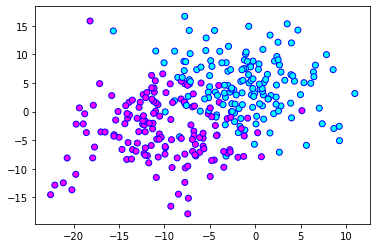

In [26]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
X, y=make_blobs(n_samples=300, random_state=1,centers=2,cluster_std=5)
plt.scatter(X[:,0],X[:,1],c=y, cmap=plt.cm.cool, edgecolor='b')
plt.show()

In [27]:
from sklearn.naive_bayes import GaussianNB
X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=33)
gau_nb = GaussianNB()
gau_nb.fit(X_train, y_train)
predict_proba = gau_nb.predict_proba(X_test)
print('预测准确率形态：{}'.format(predict_proba.shape))

预测准确率形态：(75, 2)


In [28]:
print(predict_proba[:10])

[[0.96104267 0.03895733]
 [0.00713764 0.99286236]
 [0.00981677 0.99018323]
 [0.02688074 0.97311926]
 [0.5774308  0.4225692 ]
 [0.65043577 0.34956423]
 [0.98834166 0.01165834]
 [0.5195538  0.4804462 ]
 [0.00475933 0.99524067]
 [0.9983813  0.0016187 ]]
